# YOLOv8-based Survivor Detection Model 

In [ ]:
!nvidia-smi

Sat May 27 09:40:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Installing YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Importing Dataset from Semantic Segmentation module

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="9KG0WhvnpHGdnlOuXdur")
project = rf.workspace("final-year-project-deylr").project("ensemble-3ipxs")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format

Extracting Dataset Version Zip to Ensemble-1 in yolov8:: 100%|██████████| 492/492 [00:00<00:00, 1371.31it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=500 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Ensemble-1/data.yaml, epochs=500, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1260.jpg
events.out.tfevents.1685180704.83135d81ff75.1929.0  train_batch1261.jpg
F1_curve.png					    train_batch1262.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


/content


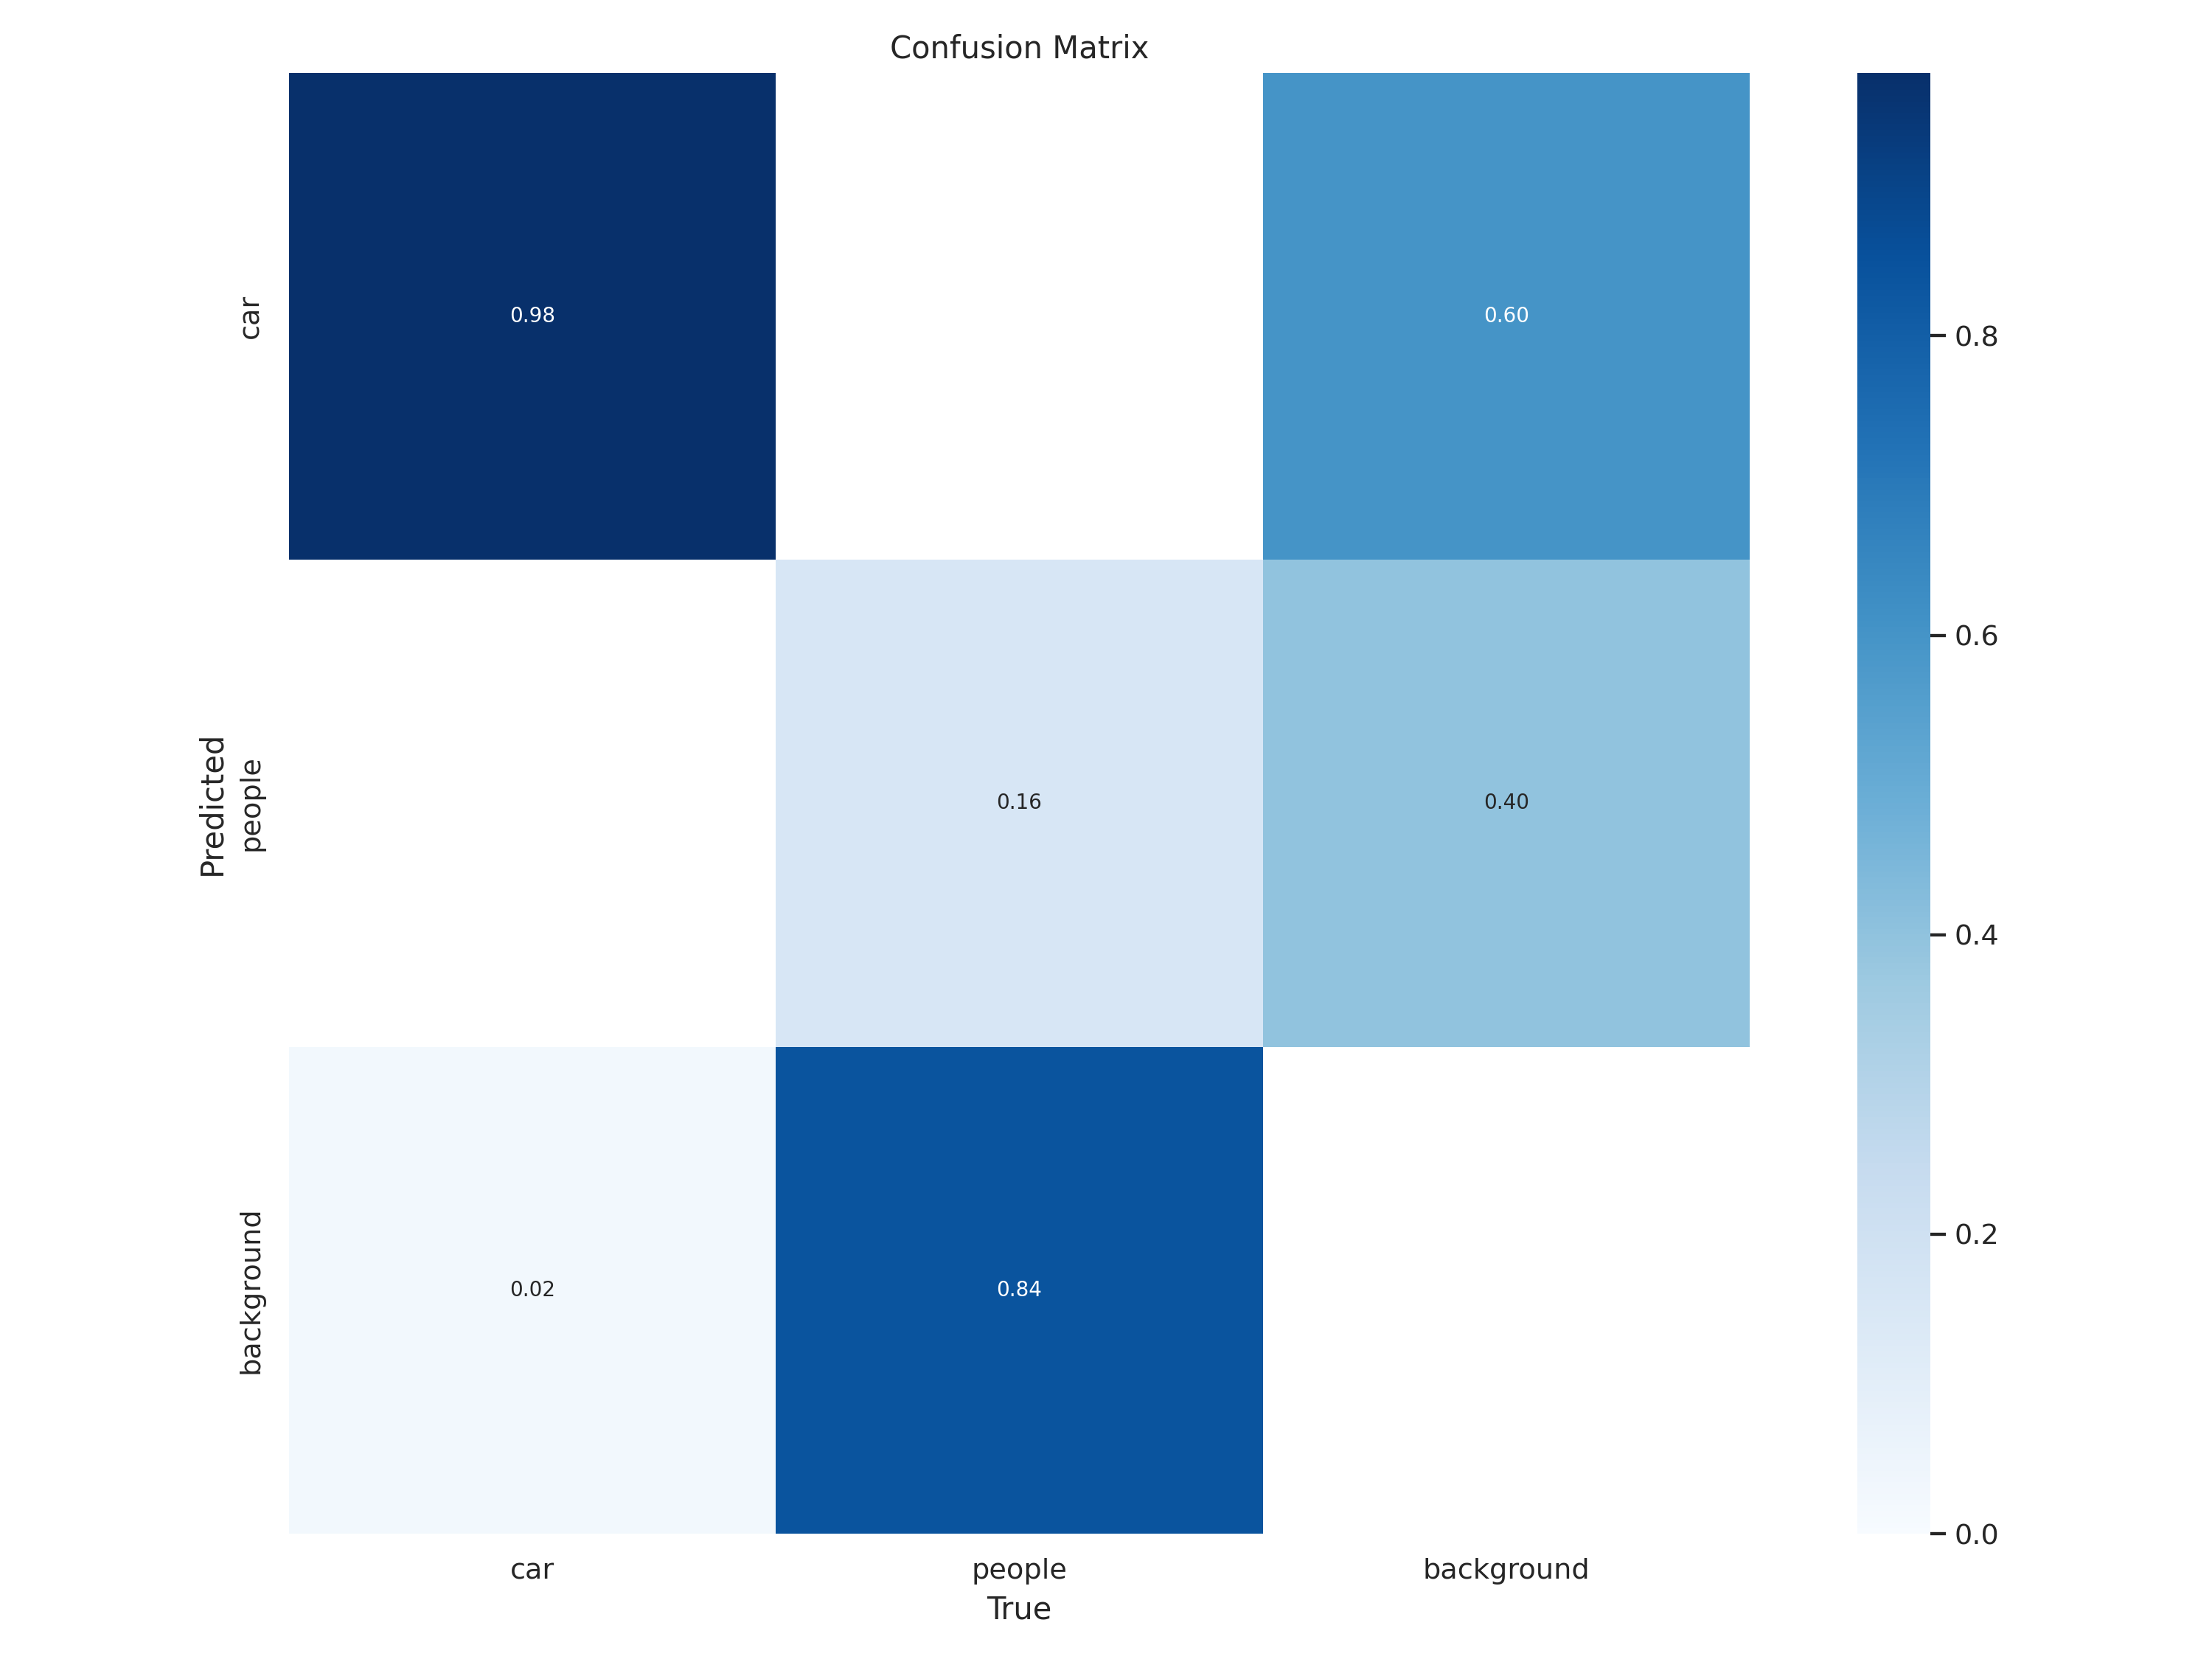

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


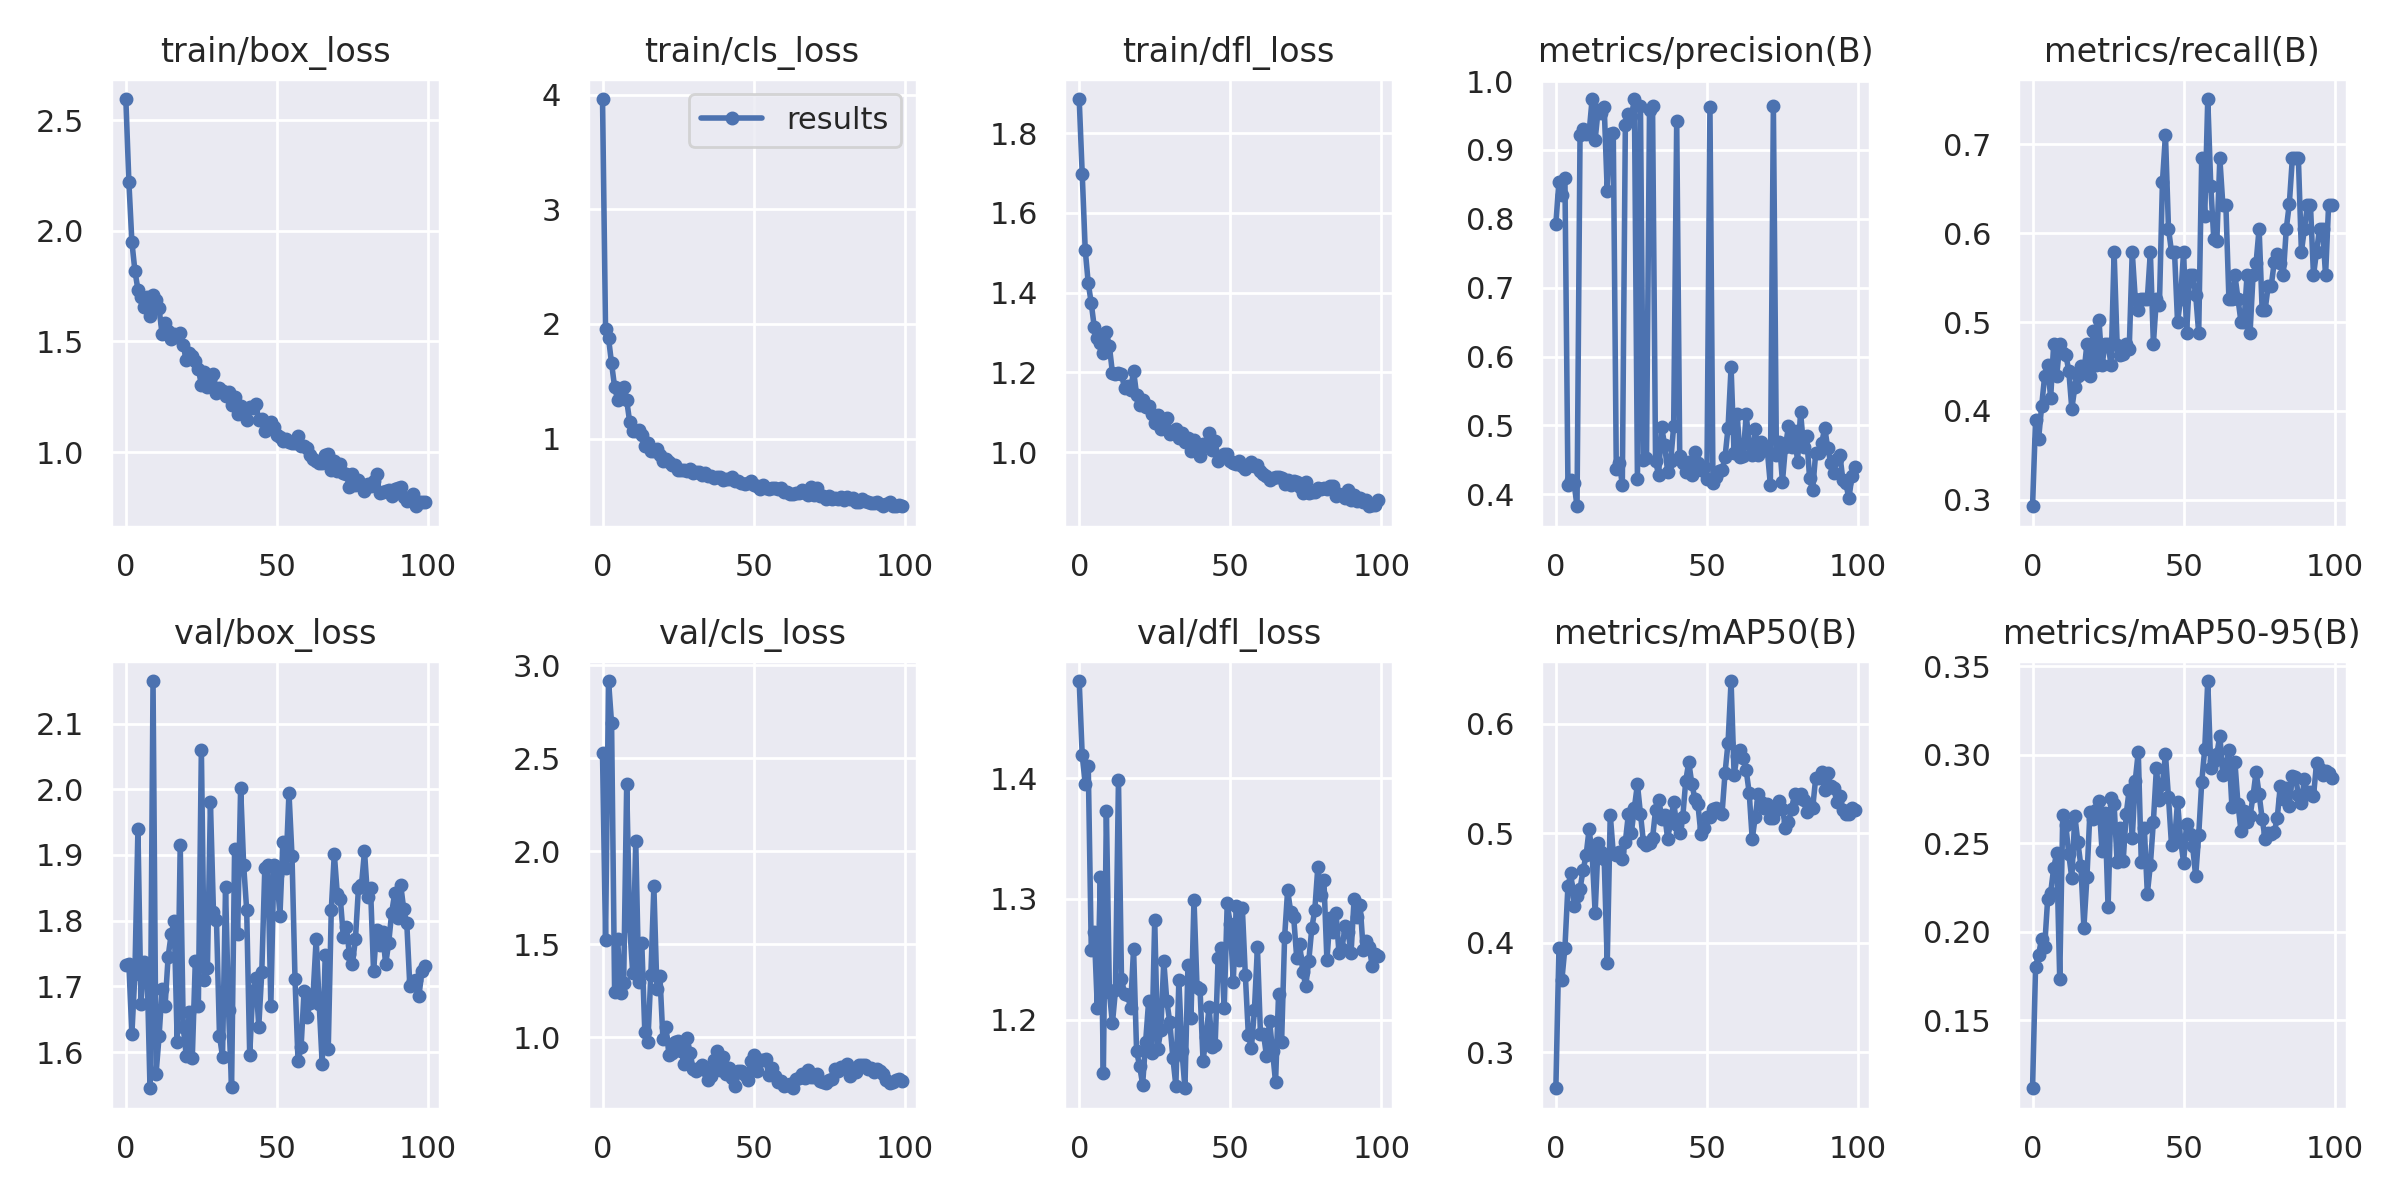

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


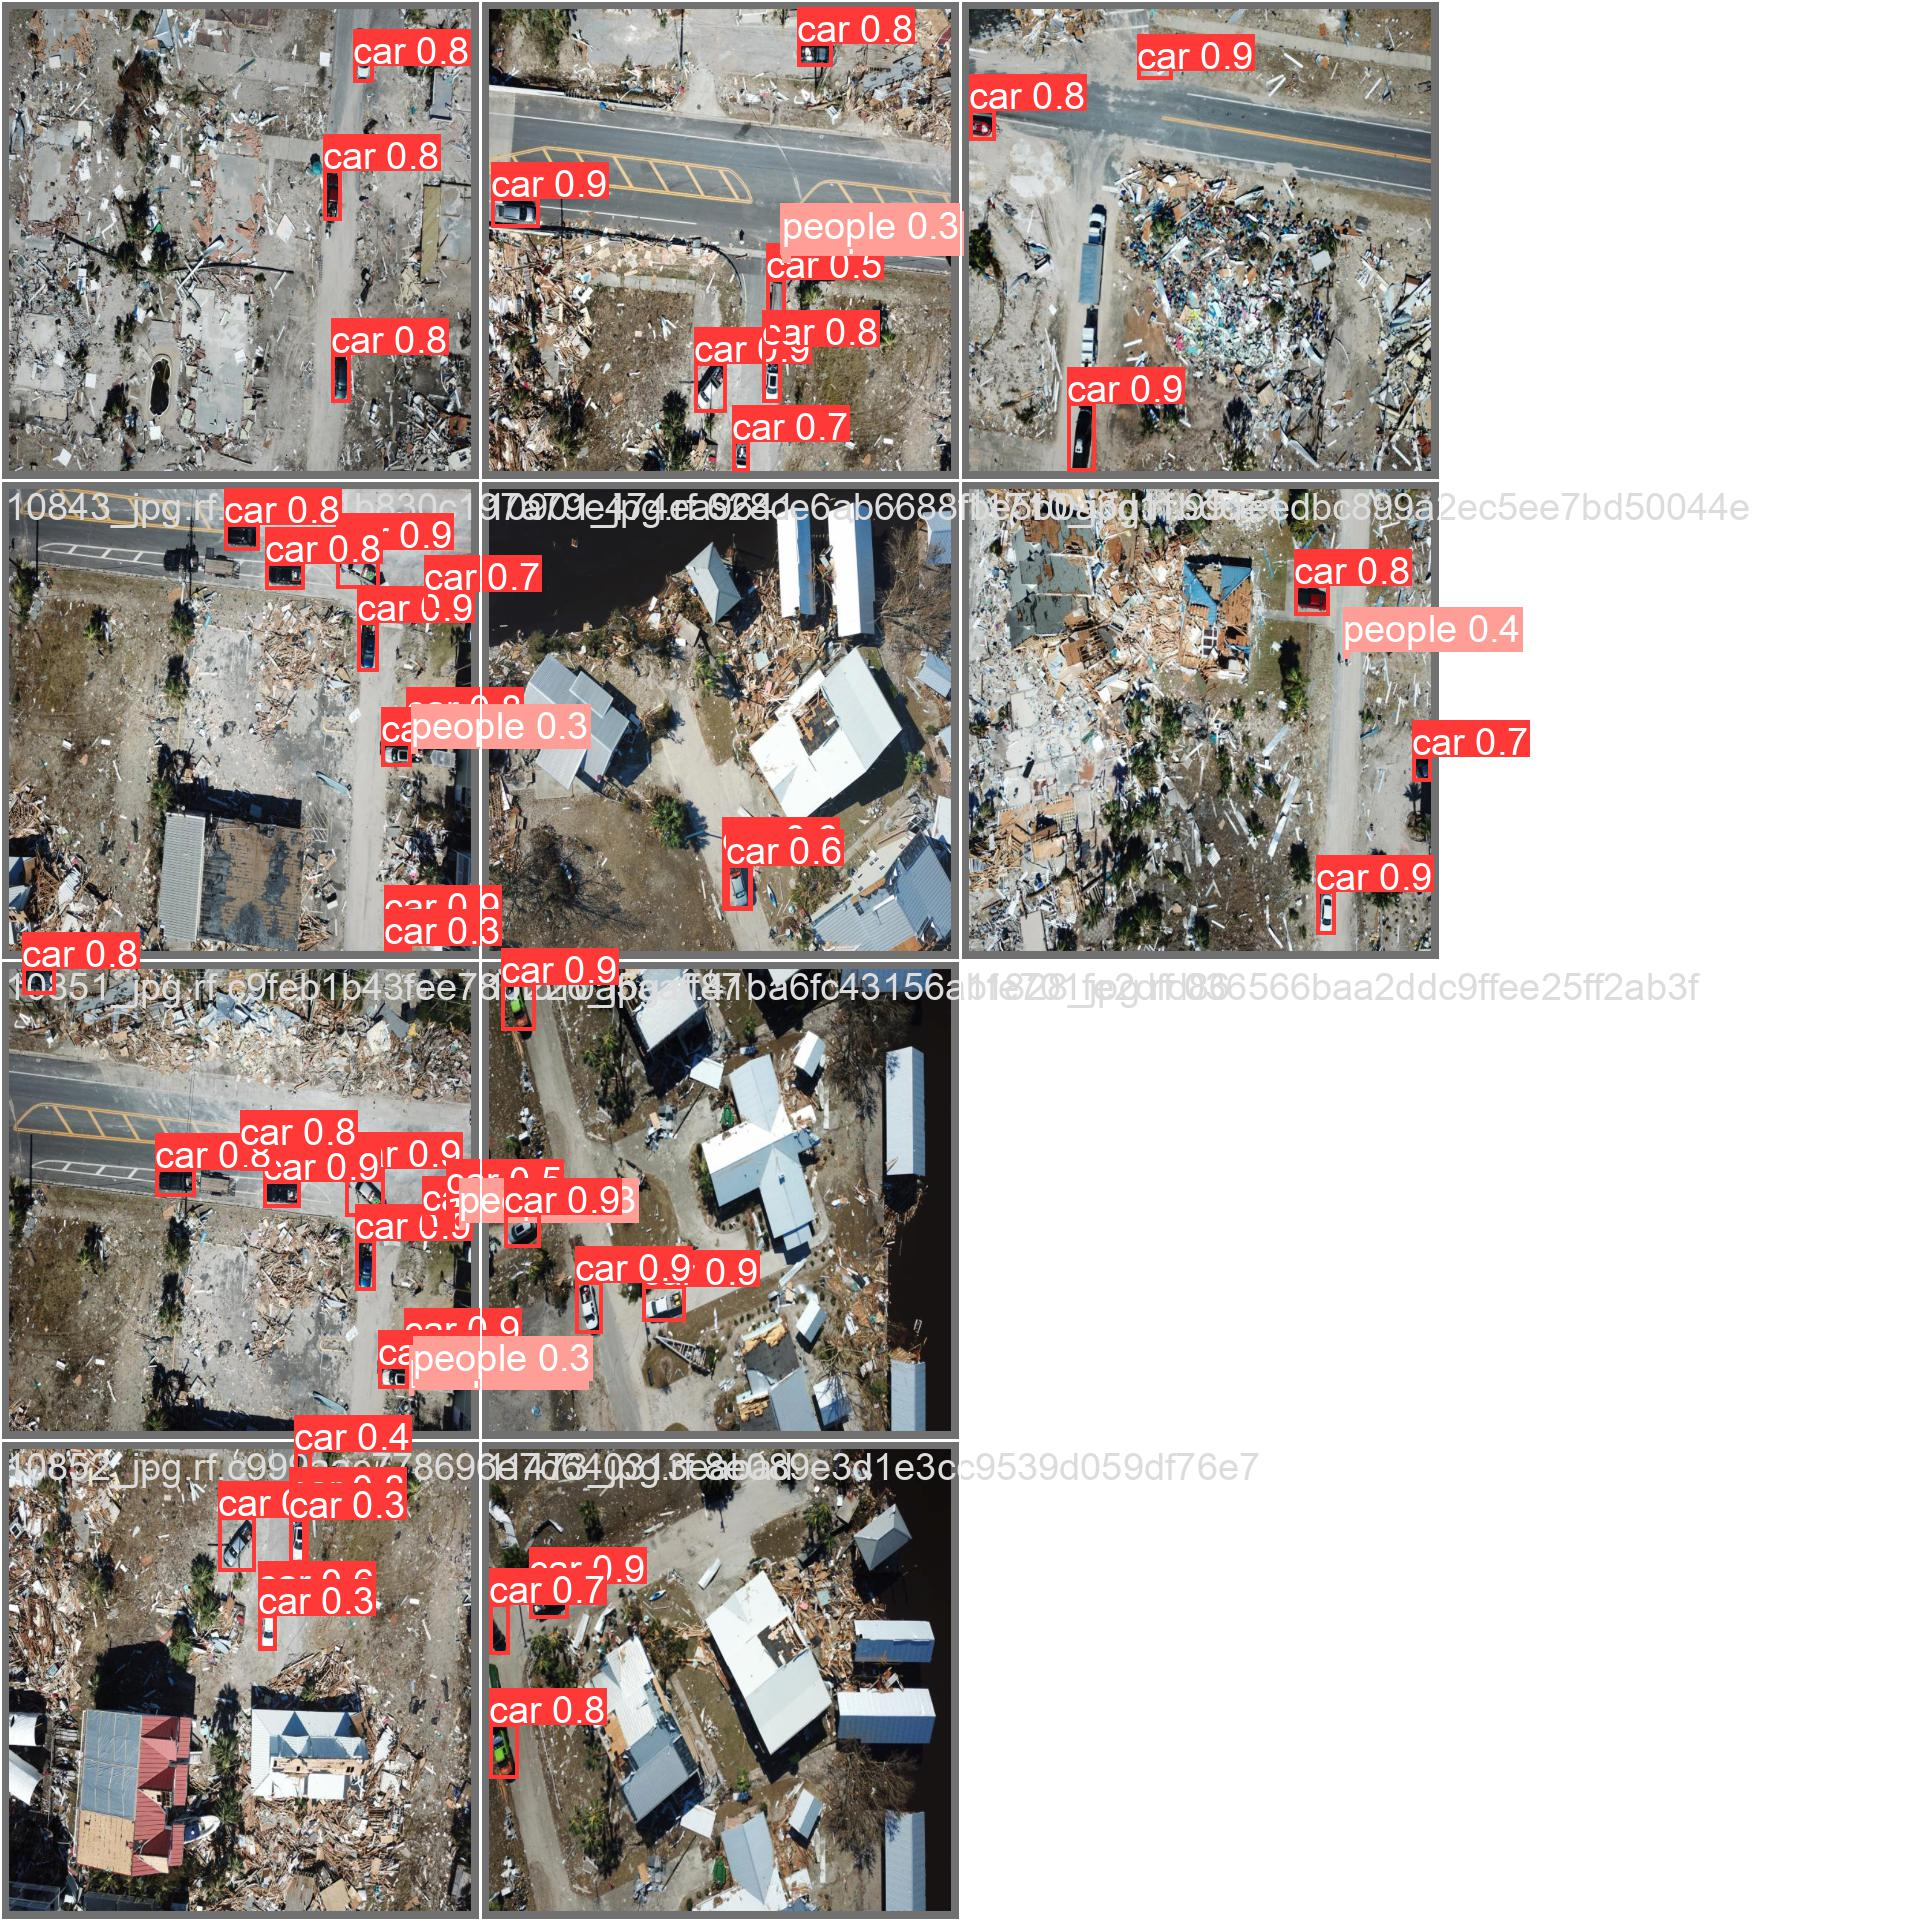

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validating Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-27 10:14:45.688362: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Ensemble-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.40it/s]
                   all         10         60      0.585      0.751      0.639      0.334
                   car         10         41      0.778      0.976      0.972      0.569
                people         10         19      0.392      0.526      0.305     0.0993
Speed: 0.3ms pre-process, 18.9ms inference, 0.0ms loss, 9.9ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-05-27 10:15:08.068041: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/20 /content/datasets/Ensemble-1/test/images/10841_jpg.rf.811a32556aa426d0283dedeb66a30f76.jpg: 800x800 3 cars, 24.6ms
image 2/20 /content/datasets/Ensemble-1/test/images/10845_jpg.rf.831f9370458b622529c6c194bb1af86f.jpg: 800x800 4 cars, 24.7ms
image 3/20 /content/datasets/Ensemble-1/test/images/10865_jpg.rf.86b7c89fa9f61d72e76dfacd94fda6df.jpg: 800x800 5 cars, 24.6ms
image 4/20 /content/datasets/Ensemble-1/test/images/10900_jpg.rf.673f15a4849539d84e5bc87c95e634fd.jpg: 800x800 6 cars, 1 people, 24.7ms
image 5/20 /content/datasets/Ensemble-1/test/images/10910_jpg.rf.16baf7f7ff30c2ddefc5e20482a1d2f1.jpg: 800x800 3 cars, 2 peoples, 24.6ms
image 6/20 /content/datasets/Ensemble-1/test/ima

**NOTE:** Let's take a look at few results.

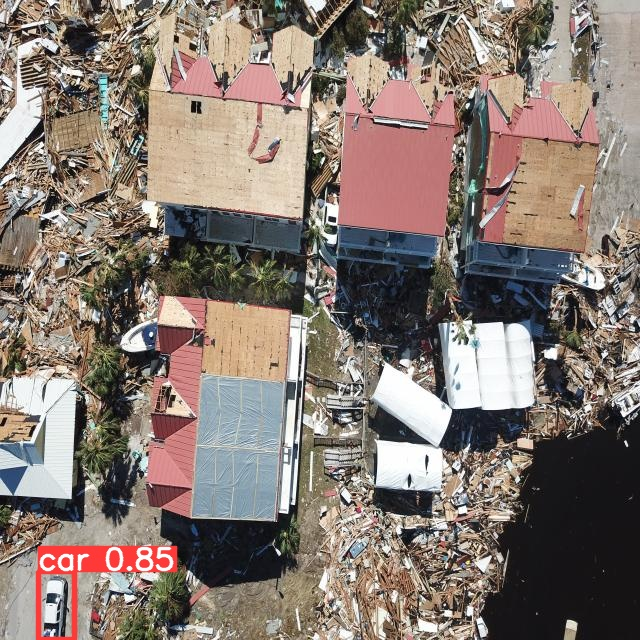

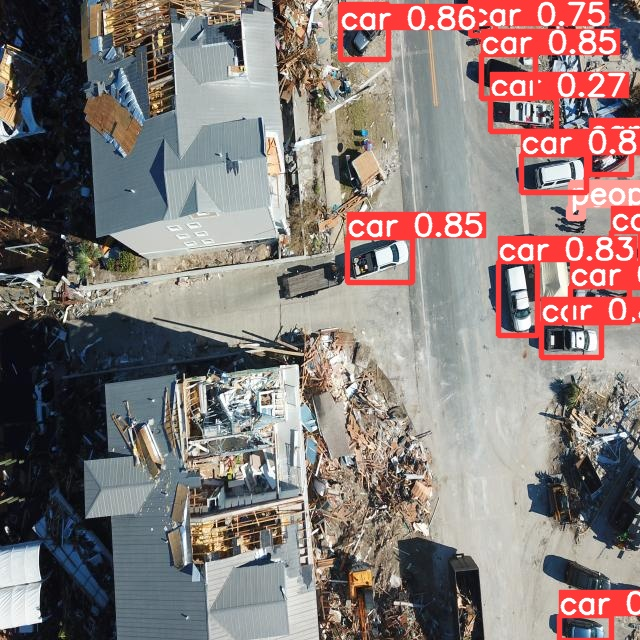

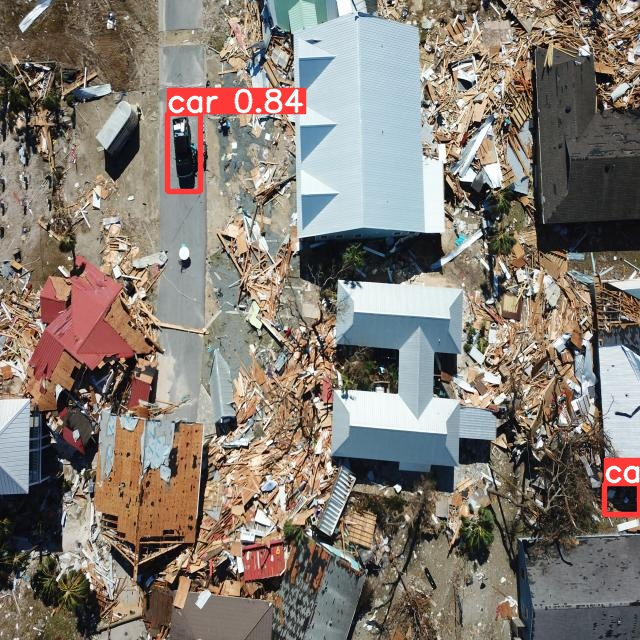

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploying model

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 11351_jpg.rf.2c81dccb2f21447fc561dc12bc435b2f.jpg


{'predictions': [{'x': 86.0,
   'y': 319.5,
   'width': 24.0,
   'height': 33.0,
   'confidence': 0.8095316886901855,
   'class': 'car',
   'image_path': '/content/datasets/Ensemble-1/test/images/11351_jpg.rf.2c81dccb2f21447fc561dc12bc435b2f.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 185.0,
   'y': 57.5,
   'width': 46.0,
   'height': 41.0,
   'confidence': 0.7602357864379883,
   'class': 'car',
   'image_path': '/content/datasets/Ensemble-1/test/images/11351_jpg.rf.2c81dccb2f21447fc561dc12bc435b2f.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 16.5,
   'y': 69.0,
   'width': 29.0,
   'height': 58.0,
   'confidence': 0.7349045872688293,
   'class': 'car',
   'image_path': '/content/datasets/Ensemble-1/test/images/11351_jpg.rf.2c81dccb2f21447fc561dc12bc435b2f.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 330.0,
   'y': 542.5,
   'width': 30.0,
   'height': 39.0,
   'confidence': 0.6390520930290222,
   'class': 'car',
   'image_path': '/cont